<a href="https://colab.research.google.com/github/imumar/weatherPrediction/blob/main/Australia_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries and reading data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

Reading the dataset

In [ ]:
df_unp = pd.read_csv('weatherAUS.csv')
df_unp.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df_unp.shape

(145460, 23)

# **Step 1.Data Preprocessing**

Checking the number of unique features in each column

In [ ]:
for col_name in df_unp.columns:
    if df_unp[col_name].dtypes == 'object':
        unique_cat = len(df_unp[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'Date' has 3436 unique categories
Feature 'Location' has 49 unique categories
Feature 'WindGustDir' has 17 unique categories
Feature 'WindDir9am' has 17 unique categories
Feature 'WindDir3pm' has 17 unique categories
Feature 'RainToday' has 3 unique categories
Feature 'RainTomorrow' has 3 unique categories


Checking if rainfall tomorrow and rainfall today have null values

In [ ]:
df_unp['RainTomorrow'].isnull().sum()

3267

In [ ]:
df_unp['RainToday'].isnull().sum()

3261

Replacing the null values with 0 and using replacing Yes and No with 1 and 0 respectively

In [ ]:
df_unp.loc[df_unp["RainToday"] == 'Yes', "RainToday"] = 1
df_unp.loc[df_unp["RainToday"] == 'No', "RainToday"] = 0
df_unp.loc[df_unp["RainTomorrow"] == 'Yes', "RainTomorrow"] = 1
df_unp.loc[df_unp["RainTomorrow"] == 'No', "RainTomorrow"] = 0
df_unp.loc[df_unp["RainToday"].isnull() , "RainToday"] = 0
df_unp.loc[df_unp["RainTomorrow"].isnull(), "RainTomorrow"] = 0


In [ ]:
df_unp.head(4)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0


Using **get_dummies** to tranform categorical features into numbers

we can also use one-hot-encoder to do the same

In [ ]:
todummy_list = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

In [ ]:
def dummy_df(df_unp, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(df_unp[x], prefix=x, dummy_na=False)
        df_unp = df_unp.drop(x, 1)
        df_unp = pd.concat([df_unp, dummies], axis=1)
    return df_unp

In [ ]:
df = dummy_df(df_unp, todummy_list)
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


Using **label encoder** and **one-hot-encoding** to transform location into numbers

In [ ]:
label_encoder = preprocessing.LabelEncoder()

df['Location']= label_encoder.fit_transform(df['Location'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder()

enc_df = pd.DataFrame(onehotencoder.fit_transform(df[['Location']]).toarray())
df = df.join(enc_df)
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,...,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,2008-12-01,2,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2008-12-02,2,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008-12-03,2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2008-12-04,2,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008-12-05,2,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can also convert location into numbers manually

In [ ]:
#list_of_Loc = df['Location'].unique()
#for i in range(len(list_of_Loc)):
#    df.loc[df['Location'] == list_of_Loc[i], 'Location'] = i

In [ ]:
#df = df.drop('Date', axis=1)

Converting date column into months only using pd.to_datetime

In [ ]:
df['Date'] = pd.to_datetime(df.Date)

In [ ]:
df.dtypes

Date        datetime64[ns]
Location             int64
MinTemp            float64
MaxTemp            float64
Rainfall           float64
                 ...      
44                 float64
45                 float64
46                 float64
47                 float64
48                 float64
Length: 117, dtype: object

In [ ]:
df['Date'] = df.Date.dt.month

renaming date column to month

In [ ]:
df = df.rename(columns= {"Date":"Month"})

Using seaborn library to check null values in the dataset

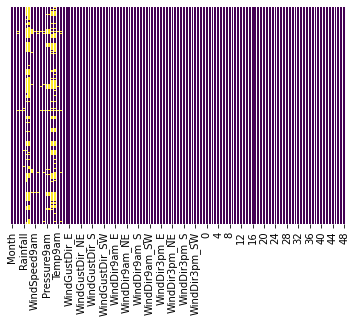

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Using fillna method to fill these null values

In [ ]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.median(), inplace=True)


Checking if all the null values are removed

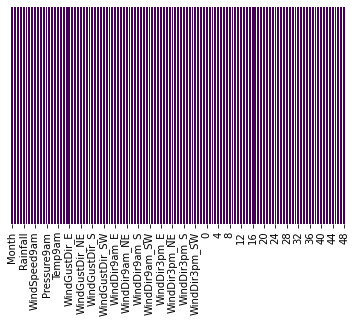

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.head(5)

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,...,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,12,2,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,2,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,2,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,2,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Exploration of dataset using plots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'RainTomorrow Distribution')

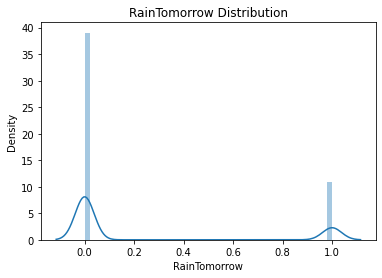

In [ ]:
sns.distplot(df['RainTomorrow']).set_title('RainTomorrow Distribution')

Text(0.5, 1.0, 'RainTomorrow based on month')

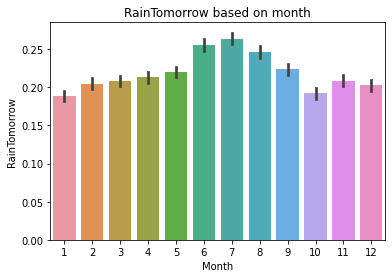

In [ ]:
sns.barplot(x = 'Month', y = 'RainTomorrow', data = df)
plt.title('RainTomorrow based on month')

Text(0.5, 1.0, 'RainTomorrow Based on RainToday')

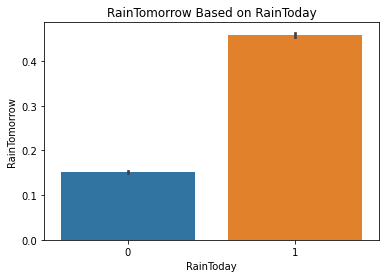

In [ ]:
sns.barplot(x = 'RainToday', y = 'RainTomorrow', data = df)
plt.title('RainTomorrow Based on RainToday')

Text(0.5, 1.0, 'RainTomorrow Based on MinTemp')

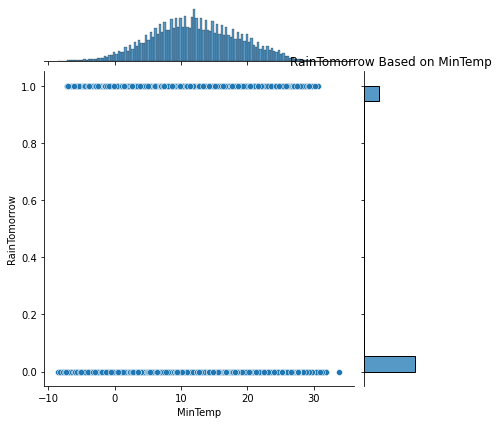

In [ ]:
sns.jointplot(x = 'MinTemp', y = 'RainTomorrow', data = df)
plt.title('RainTomorrow Based on MinTemp')

Text(0.5, 1.0, 'RainTomorrow based on Cloud3pm')

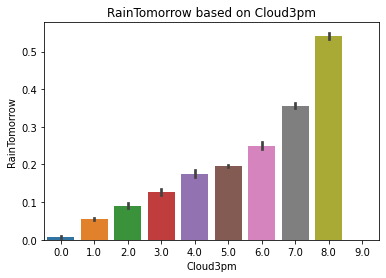

In [ ]:
sns.barplot(x = 'Cloud3pm', y = 'RainTomorrow', data = df)
plt.title('RainTomorrow based on Cloud3pm')

Text(0.5, 1.0, 'RainTomorrow based on WindSpeed3pm')

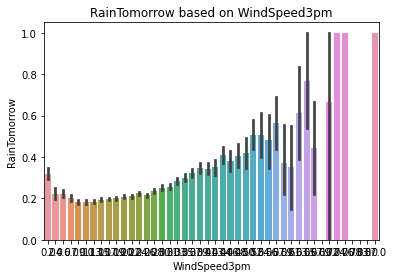

In [ ]:
sns.barplot(x = 'WindSpeed3pm', y = 'RainTomorrow', data = df)
plt.title('RainTomorrow based on WindSpeed3pm')

Text(0.5, 1.0, 'RainTomorrow based on Humidity3pm')

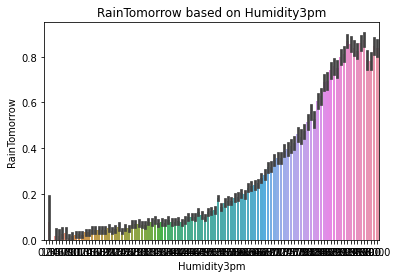

In [ ]:
sns.barplot(x = 'Humidity3pm', y = 'RainTomorrow', data = df)
plt.title('RainTomorrow based on Humidity3pm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Rains Tommorow against humidity at 3')

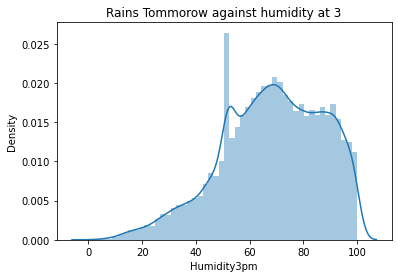

In [ ]:
rainsTom = df[df.RainTomorrow == 1]
sns.distplot(rainsTom['Humidity3pm'])
plt.title('Rains Tommorow against humidity at 3')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Does not Rain Tommorow against humidity at 3')

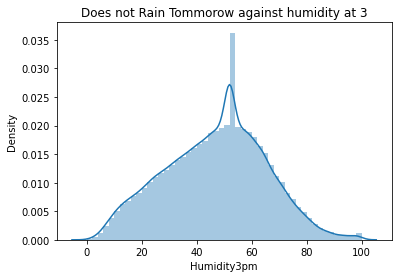

In [ ]:
rainsTom = df[df.RainTomorrow == 0]
sns.distplot(rainsTom['Humidity3pm'])
plt.title('Does not Rain Tommorow against humidity at 3')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Rains Tommorow against wind speed at 3')

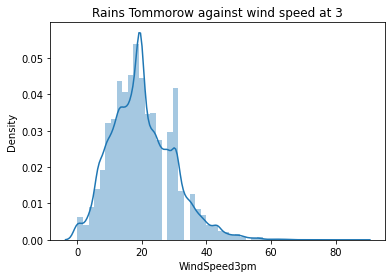

In [ ]:
rainsTom = df[df.RainTomorrow == 1]
sns.distplot(rainsTom['WindSpeed3pm'])
plt.title('Rains Tommorow against wind speed at 3')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Does not Rain Tommorow against wind speed at 3')

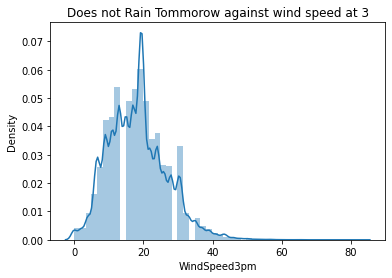

In [ ]:
rainsTom = df[df.RainTomorrow == 0]
sns.distplot(rainsTom['WindSpeed3pm'])
plt.title('Does not Rain Tommorow against wind speed at 3')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Rains Tommorow against cloud cover at 3')

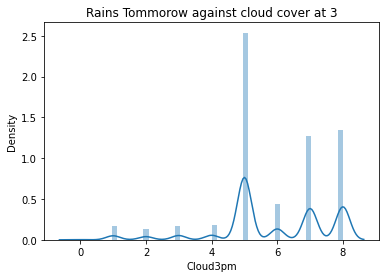

In [ ]:
rainsTom = df[df.RainTomorrow == 1]
sns.distplot(rainsTom['Cloud3pm'])
plt.title('Rains Tommorow against cloud cover at 3')

From above plots it is clear that wind speed at 3, cloud cover at 3 and humidity at 3 features have medium-strong correlations with rains tomorrow

Assign X as a DataFrame of features and y as a Series of the outcome variable


In [ ]:
X =df.drop('RainTomorrow', 1)
Y =df.RainTomorrow

In [ ]:
X.head(5)

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,...,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,12,2,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,12,2,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12,2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,2,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,2,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

Splitting data set into training and testing sets. 80% of the dataframe for training and 20% of the dataframe for testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
X_train.describe()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,...,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.00000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.00000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,6.399165,23.778006,12.193672,23.221716,2.318505,5.181164,7.991720,39.977820,14.031736,18.683220,68.901133,51.547436,1017.631198,1015.235048,4.657707,4.708038,16.988733,21.673106,0.219313,0.063007,0.055960,0.051079,0.063557,0.04924,0.045038,0.045631,0.055926,0.062827,0.065130,0.063488,0.059965,0.061323,0.068515,0.057189,0.061933,0.063806,0.054173,0.052386,0.081156,0.052549,...,0.023314,0.020899,0.020684,0.020753,0.021939,0.021148,0.021784,0.010811,0.020891,0.021956,0.020830,0.020667,0.020667,0.020727,0.020959,0.020702,0.010518,0.020633,0.020753,0.02065,0.020461,0.021123,0.022051,0.020495,0.020530,0.020513,0.020667,0.020762,0.023030,0.020598,0.020865,0.020959,0.010914,0.020676,0.020641,0.020865,0.020977,0.020719,0.020693,0.020470
std,3.427515,14.236171,6.367472,7.093939,8.472336,3.155931,2.757499,13.125401,8.850677,8.731319,18.877700,20.505474,6.729251,6.667499,2.283043,2.107257,6.455383,6.855997,0.413783,0.242977,0.229846,0.220161,0.243963,0.21637,0.207389,0.208685,0.229780,0.242652,0.246755,0.243840,0.237423,0.239922,0.252629,0.232205,0.241035,0.244408,0.226360,0.222804,0.273076,0.223132,...,0.150899,0.143048,0.142326,0.142557,0.146485,0.143880,0.145979,0.103411,0.143019,0.146541,0.142817,0.142268,0.142268,0.142471,0.143249,0.142384,0.102019,0.142152,0.142557,0.14221,0.141571,0.143794,0.146849,0.141688,0.141804,0.141746,0.142268,0.142586,0.150001,0.142036,0.142932,0.143249,0.103897,0.142297,0.142181,0.142932,0.143306,0.142442,0.142355,0.141601
min,1.000000,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,11.000000,7.700000,18

# **Step 2**.**Feature Scaling**

In [ ]:
X_train.head(2)

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,...,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
43380,3,47,21.6,25.2,0.0,4.8,8.4,57.0,33.0,39.0,72.0,79.0,1020.7,1022.6,5.0,8.0,25.1,21.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2199,3,2,11.3,30.3,0.0,4.8,8.4,33.0,0.0,19.0,70.0,27.0,1013.0,1009.5,1.0,5.0,16.2,28.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Data scaling using RobustScaler**

since our data contains outlier and the outcome is based on those outliers, we use robust scaler as it works well with outliers

In [ ]:
from sklearn.preprocessing import RobustScaler
robsc = RobustScaler().fit(X_train)
X_train_rs = robsc.transform(X_train)
X_test_rs = robsc.transform(X_test)

In [ ]:
X_train_rs = pd.DataFrame(X_train_rs, columns=X_train.columns)
X_test_rs = pd.DataFrame(X_test_rs, columns=X_test.columns)

In [ ]:
X_train_rs.head(5)

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,...,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,-0.500000,0.92,1.054945,0.254902,0.000000,0.000000,0.0,1.200000,1.666667,1.818182,0.076923,0.964286,0.373494,0.880952,0.000000,1.5,0.913043,-0.010417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.500000,-0.88,-0.076923,0.754902,0.000000,0.000000,0.0,-0.400000,-1.083333,0.000000,0.000000,-0.892857,-0.554217,-0.678571,-1.333333,0.0,-0.054348,0.802083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.500000,0.60,1.340659,0.441176,0.000000,-0.666667,-16.4,-0.266667,0.583333,0.454545,0.538462,1.000000,-0.614458,-0.666667,1.000000,1.5,0.847826,0.541667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.666667,-0.64,1.252747,0.745098,39.333333,0.000000,-7.8,0.466667,0.333333,0.272727,0.730769,1.035714,-0.867470,-0.869048,0.333333,0.5,1.054348,0.687500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.833333,-0.40,0.901099,0.656863,0.000000,0.000000,0.0,0.000000,0.333333,0.272727,-0.423077,0.142857,-0.361446,-0.202381,0.000000,0.0,1.130435,0.677083,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_rs.describe()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,...,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.00000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.00000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,0.066527,-0.008880,0.021283,0.060953,3.864175,0.317637,-0.816560,0.065188,0.085978,-0.028798,-0.042264,-0.016163,0.003759,0.004172,-0.114098,-0.145981,0.031384,0.059699,0.219313,0.063007,0.055960,0.051079,0.063557,0.04924,0.045038,0.045631,0.055926,0.062827,0.065130,0.063488,0.059965,0.061323,0.068515,0.057189,0.061933,0.063806,0.054173,0.052386,0.081156,0.052549,...,0.023314,0.020899,0.020684,0.020753,0.021939,0.021148,0.021784,0.010811,0.020891,0.021956,0.020830,0.020667,0.020667,0.020727,0.020959,0.020702,0.010518,0.020633,0.020753,0.02065,0.020461,0.021123,0.022051,0.020495,0.020530,0.020513,0.020667,0.020762,0.023030,0.020598,0.020865,0.020959,0.010914,0.020676,0.020641,0.020865,0.020977,0.020719,0.020693,0.020470
std,0.571252,0.569447,0.699722,0.695484,14.120559,2.629942,5.514998,0.875027,0.737556,0.793756,0.726065,0.732338,0.810753,0.793750,0.761014,1.053629,0.701672,0.714166,0.413783,0.242977,0.229846,0.220161,0.243963,0.21637,0.207389,0.208685,0.229780,0.242652,0.246755,0.243840,0.237423,0.239922,0.252629,0.232205,0.241035,0.244408,0.226360,0.222804,0.273076,0.223132,...,0.150899,0.143048,0.142326,0.142557,0.146485,0.143880,0.145979,0.103411,0.143019,0.146541,0.142817,0.142268,0.142268,0.142471,0.143249,0.142384,0.102019,0.142152,0.142557,0.14221,0.141571,0.143794,0.146849,0.141688,0.141804,0.141746,0.142268,0.142586,0.150001,0.142036,0.142932,0.143249,0.103897,0.142297,0.142181,0.142932,0.143306,0.142442,0.142355,0.141601
min,-0.833333,-0.960000,-2.252747,-2.686275,0.000000,-4.000000,-16.800000,-2.200000,-1.083333,-1.727273,-2.692308,-1.857143,-4.469880,-4.404762,-1.666667,-2.500000,-2.597826,-2.760417,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.500000,-0.520000,-0.472527,-0

# **Step 3**.**Feature** **selection**

**Using mutual information/information gain**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train_rs, Y_train)
mutual_info

array([2.61059931e-03, 1.18176475e-02, 6.71578993e-03, 1.31650881e-02,
       5.21406053e-02, 6.49827032e-03, 5.47104580e-02, 2.45417433e-02,
       3.89046545e-03, 6.36369699e-03, 3.69907707e-02, 1.08369658e-01,
       2.84202739e-02, 2.24896873e-02, 3.69176983e-02, 4.96997925e-02,
       1.63066117e-03, 2.00488822e-02, 4.28303016e-02, 1.56913443e-03,
       9.46630186e-04, 1.99091559e-04, 0.00000000e+00, 0.00000000e+00,
       9.79220653e-04, 2.74916618e-03, 2.49087645e-03, 0.00000000e+00,
       4.07304359e-04, 1.87553214e-03, 0.00000000e+00, 1.57736442e-04,
       2.41591929e-03, 1.03656758e-03, 1.99023152e-03, 1.07320082e-03,
       1.13440464e-03, 1.97214414e-04, 0.00000000e+00, 4.74315460e-04,
       1.59178968e-04, 6.22657626e-04, 0.00000000e+00, 0.00000000e+00,
       1.61584777e-03, 0.00000000e+00, 0.00000000e+00, 3.80619001e-04,
       2.10905414e-06, 6.93579278e-04, 1.42683349e-03, 0.00000000e+00,
       0.00000000e+00, 3.54936048e-04, 1.33450918e-03, 0.00000000e+00,
      

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_rs.columns
mutual_info.sort_values(ascending=False)

Humidity3pm       0.108370
Sunshine          0.054710
Rainfall          0.052141
Cloud3pm          0.049700
RainToday         0.042830
                    ...   
7                 0.000000
8                 0.000000
WindGustDir_S     0.000000
WindDir3pm_ENE    0.000000
28                0.000000
Length: 116, dtype: float64

**Plotting most important features**

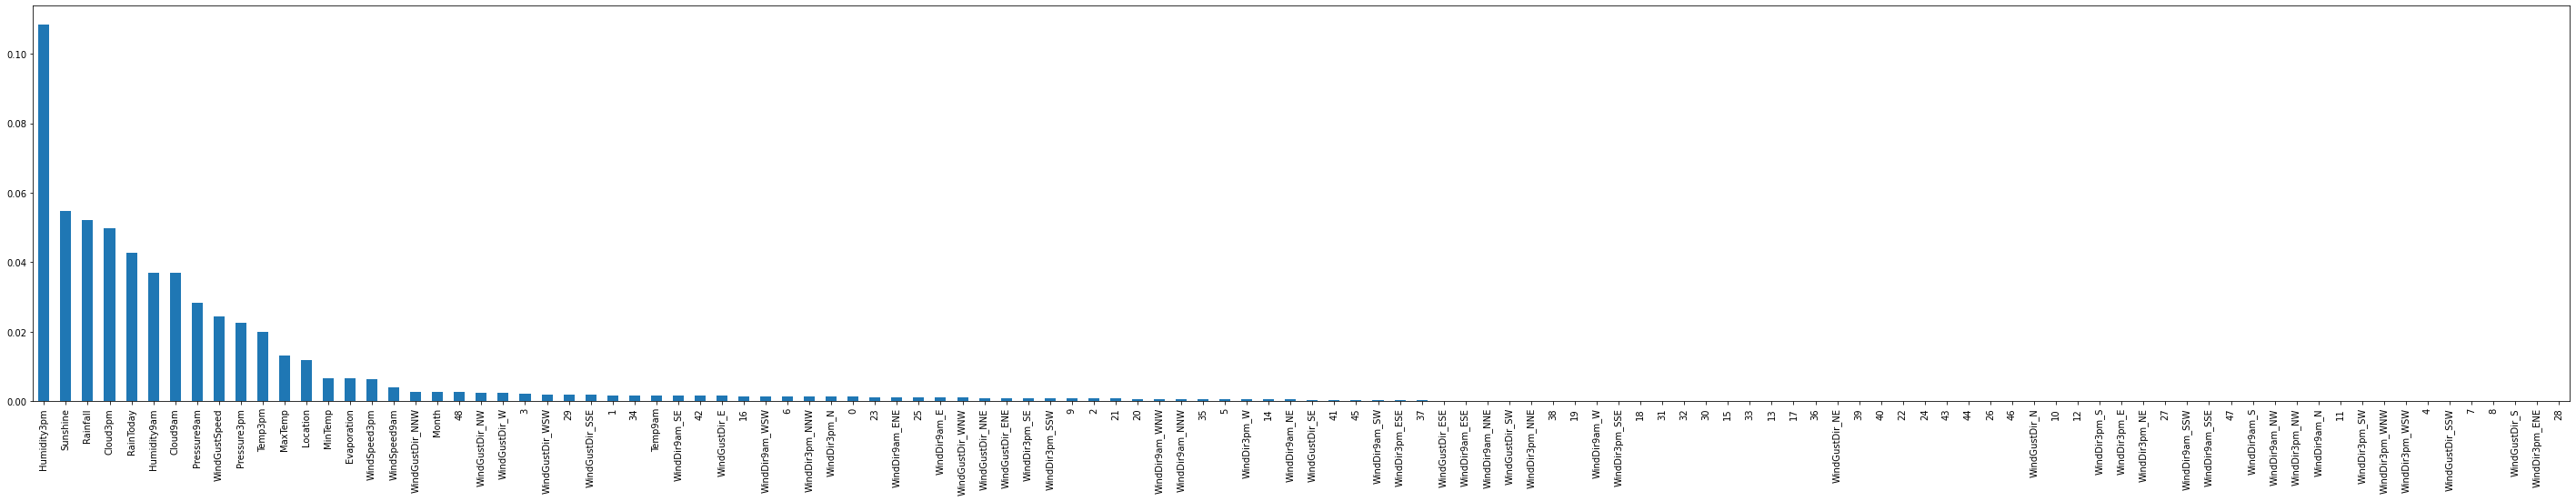

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(50, 8))



We select only top 13 features using SelectKbest feature selection, rest are discarded

In [ ]:
from sklearn.feature_selection import SelectKBest
sel_top_cols = SelectKBest(mutual_info_classif, k=13)
sel_top_cols.fit(X_train_rs, Y_train)
X_train_top = X_train_rs.columns[sel_top_cols.get_support()]

In [ ]:
X_train_sc = X_train_rs[X_train_top]
X_test_sc = X_test_rs[X_train_top]

In [ ]:
X_train_sc.head(3)

,Location,MaxTemp,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp3pm,RainToday
0,0.92,0.254902,0.0,0.0,1.200000,0.076923,0.964286,0.373494,0.880952,0.000000,1.5,-0.010417,0.0
1,-0.88,0.754902,0.0,0.0,-0.400000,0.000000,-0.892857,-0.554217,-0.678571,-1.333333,0.0,0.802083,0.0
2,0.60,0.441176,0.0,-16.4,-0.266667,0.538462,1.000000,-0.614458,-0.666667,1.000000,1.5,0.541667,0.0


Plot of correlation of different features

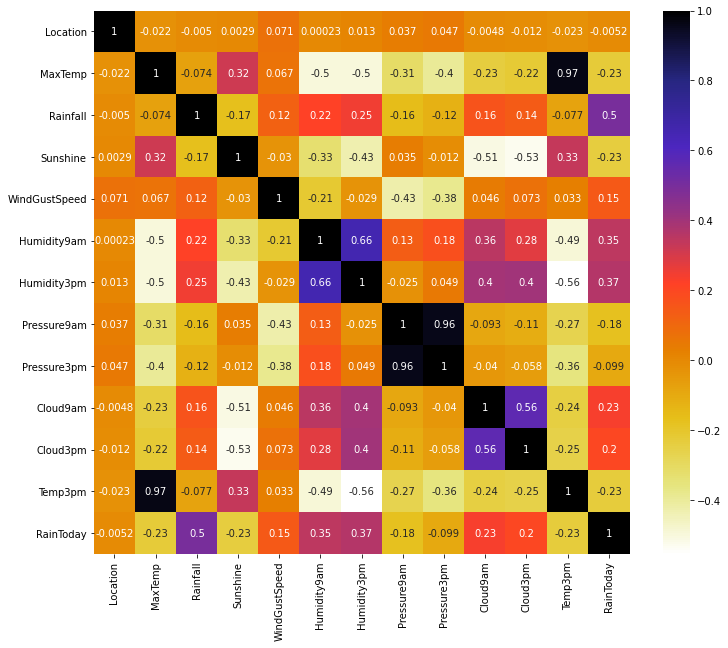

In [ ]:
plt.figure(figsize=(12,10))
cor = X_train_sc.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# **Step 4.Training the models**

In [ ]:
from sklearn.metrics import accuracy_score

def acc(model,x,y):
  ac = accuracy_score(y,model.predict(x))
  return ac

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_Model = LogisticRegression()
LR_fit= LR_Model.fit(X_train_sc, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
LR_Score=acc(LR_fit,X_test_sc,Y_test)

In [ ]:
#LR_Score=LR_Model.score(X_test_sc, Y_test)

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_Model = RandomForestClassifier()
RF_fit=RF_Model.fit(X_train_sc, Y_train)

In [ ]:
RF_Score=acc(RF_fit,X_test_sc,Y_test)

**K-Nearest-Neighbours Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Model = KNeighborsClassifier()
KNN_fit=KNN_Model.fit(X_train_sc, Y_train)

In [ ]:
KNN_Score=acc(KNN_fit,X_test_sc,Y_test)

**XGBoost Classifier**

In [ ]:
from xgboost import XGBClassifier
XGB_Model = XGBClassifier(objective = "binary:logistic", n_estimators = 10, seed = 123)
XGB_fit=XGB_Model.fit(X_train_sc, Y_train)

In [ ]:
XGB_Score=acc(XGB_fit,X_test_sc,Y_test)

In [ ]:
print(XGB_Score)

0.8338031073834731


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_Model = DecisionTreeClassifier()
DT_fit=DT_Model.fit(X_train_sc, Y_train)

In [ ]:
DT_Score=acc(DT_fit,X_test_sc,Y_test)

In [ ]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression',
                                                      'RandomForestClassifier',
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'XGBClassifier'],
                                            'Accuracy': [LR_Score,
                                                         RF_Score,
                                                         KNN_Score,
                                                         DT_Score,
                                                         XGB_Score]})

In [ ]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
1,RandomForestClassifier,0.856593
0,LogisticRegression,0.842878
4,XGBClassifier,0.833803
2,KNeighborsClassifier,0.828131
3,DecisionTreeClassifier,0.789083


# **Step 5.Cross Validation using K(2) Fold:**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
def cv(X_Model):
  accuracy = cross_val_score(X_Model, X_test_sc, Y_test, cv=2, scoring='accuracy')
  Acc= print("Accuracy: %0.5f (+/- %0.5f)" %  (accuracy.mean(), accuracy.std() * 2))
  precision = cross_val_score(X_Model, X_test_sc, Y_test, cv=2, scoring='precision')
  Pre= print("Precision: %0.5f (+/- %0.5f)" % (precision.mean(), precision.std() * 2))
  recall = cross_val_score(X_Model, X_test_sc, Y_test, cv=2, scoring='recall')
  Rec=print("Recall: %0.5f (+/- %0.5f)" %  (recall.mean(), recall.std() * 2))
  f = cross_val_score(X_Model, X_test_sc, Y_test, cv=2, scoring='f1')
  Fm=  print("F-measure: %0.5f (+/- %0.5f)" % (f.mean(), f.std() * 2))
  return (Acc,Pre,Rec,Fm)

**Logistic** **regression**

In [ ]:
#Acc, Pre, Rec, Fm = cv(LR_Model)

**Random Forest CLassifier**

In [ ]:
Acc, Pre, Rec, Fm = cv(RF_Model)

Accuracy: 0.84748 (+/- 0.00158)
Precision: 0.73605 (+/- 0.01324)
Recall: 0.47999 (+/- 0.00599)
F-measure: 0.58331 (+/- 0.00829)


**KNN Classifier**

In [ ]:
Acc, Pre, Rec, Fm = cv(KNN_Model)

Accuracy: 0.81875 (+/- 0.01134)
Precision: 0.62291 (+/- 0.04059)
Recall: 0.44099 (+/- 0.03595)
F-measure: 0.51618 (+/- 0.03227)


**XGBoost Classifier**

In [ ]:
Acc, Pre, Rec, Fm = cv(XGB_Model)

Accuracy: 0.83349 (+/- 0.01366)
Precision: 0.73159 (+/- 0.05901)
Recall: 0.38066 (+/- 0.03842)
F-measure: 0.50061 (+/- 0.04407)


**Decision Tree Classifier**

In [ ]:
Acc, Pre, Rec, Fm = cv(DT_Model)

Accuracy: 0.77430 (+/- 0.01135)
Precision: 0.49235 (+/- 0.03297)
Recall: 0.51278 (+/- 0.04630)
F-measure: 0.50002 (+/- 0.03369)


**Confusion Matrices**

**1.LR**

In [ ]:
Y_prediction=LR_Model.predict(X_test_sc)
pd.crosstab(Y_test, Y_prediction, rownames=['Actual rains'], colnames=['Predicted rains'])

Predicted rains,0,1
Actual rains,,
0,21503,1208
1,3374,3007


**2.RF**

In [ ]:
Y_prediction=RF_Model.predict(X_test_sc)
pd.crosstab(Y_test, Y_prediction, rownames=['Actual rains'], colnames=['Predicted rains'])

Predicted rains,0,1
Actual rains,,
0,21613,1098
1,3201,3180


**3.KNN**

In [ ]:
Y_prediction=KNN_Model.predict(X_test_sc)
pd.crosstab(Y_test, Y_prediction, rownames=['Actual rains'], colnames=['Predicted rains'])

Predicted rains,0,1
Actual rains,,
0,20998,1713
1,3365,3016


**4.XGB**

In [ ]:
Y_prediction=XGB_Model.predict(X_test_sc)
pd.crosstab(Y_test, Y_prediction, rownames=['Actual rains'], colnames=['Predicted rains'])

Predicted rains,0,1
Actual rains,,
0,21961,750
1,4059,2322


**5.DT**

In [ ]:
Y_prediction=DT_Model.predict(X_test_sc)
pd.crosstab(Y_test, Y_prediction, rownames=['Actual rains'], colnames=['Predicted rains'])

Predicted rains,0,1
Actual rains,,
0,19417,3294
1,3058,3323


# Since our most accurate model is random forest, we use RFE to increase its accuracy

it doesnt improve accuracy of the model but takes a long time to execute so i've commented it out

In [ ]:
#from sklearn.feature_selection import RFE
#from sklearn.metrics import accuracy_score

In [ ]:
#rfe = RFE(estimator=RF_Model, step=1)
#rfe = rfe.fit(X_train_rs, Y_train)

In [ ]:
#selected_rfe_features = pd.DataFrame({'Feature':list(X_train_rs.columns),
                                      'Ranking':rfe.ranking_})
#selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,Month,1
33,WindGustDir_WNW,1
34,WindGustDir_WSW,1
38,WindDir9am_N,1
39,WindDir9am_NE,1
...,...,...
92,25,55
70,3,56
106,39,57
83,16,58


In [ ]:
#def acc(model,x,y):
#  ac = accuracy_score(y,model.predict(x))
#  print('acc', ac)

In [ ]:
#x_train_rfe = rfe.transform(X_train_rs)
#x_test_rfe = rfe.transform(X_test_rs)

In [ ]:
#lr_rfe_model = RF_Model.fit(x_train_rfe, Y_train)

In [ ]:
#acc(lr_rfe_model,x_test_rfe,Y_test)

acc 0.8552179293276502


Cross Validation and feature selection using RFECV

In [ ]:
#from sklearn.feature_selection import RFECV

#rfecv = RFECV(estimator=RF_Model, step=1, cv=5, scoring='accuracy')
#rfecv = rfecv.fit(X_train_rs, Y_train)
#print('Optimal number of features :', rfecv.n_features_)
#print('Best features :', X_train_rs.columns[rfecv.support_])

Optimal number of features : 105
Best features : Index([        'Month',      'Location',       'MinTemp',       'MaxTemp',
            'Rainfall',   'Evaporation',      'Sunshine', 'WindGustSpeed',
        'WindSpeed9am',  'WindSpeed3pm',
       ...
                    36,              37,              38,              40,
                    42,              43,              44,              45,
                    46,              47],
      dtype='object', length=105)


In [ ]:
#rfecv.grid_scores_


array([0.82476279, 0.80204176, 0.81456239, 0.8265846 , 0.83175786,
       0.83665612, 0.84134813, 0.84604014, 0.84908223, 0.85042279,
       0.85073216, 0.85379141, 0.85311252, 0.85382578, 0.85338751,
       0.85441014, 0.85405779, 0.85440153, 0.85394609, 0.85481402,
       0.85463356, 0.85453902, 0.85475388, 0.85447028, 0.85451326,
       0.85477964, 0.85517494, 0.85453903, 0.85401482, 0.85441873,
       0.85435858, 0.85480543, 0.85483981, 0.85438434, 0.85458198,
       0.85528666, 0.85444451, 0.85464215, 0.85489996, 0.85398046,
       0.85415232, 0.85455622, 0.85447028, 0.85456481, 0.8543242 ,
       0.85456482, 0.85421247, 0.85391172, 0.85474527, 0.85403201,
       0.85428124, 0.85424687, 0.85492573, 0.8541867 , 0.85397187,
       0.85493433, 0.85410078, 0.85390313, 0.85453903, 0.85445309,
       0.85396328, 0.85446168, 0.85410076, 0.85444451, 0.85436715,
       0.85441012, 0.85425544, 0.85467652, 0.85505463, 0.85421249,
       0.85459058, 0.85447029, 0.85494292, 0.85472807, 0.85460

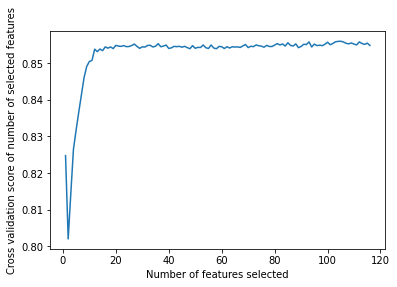

In [ ]:
#plt.figure()
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score of number of selected features")
#plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
#plt.show()

In [ ]:
#x_train_rfecv = rfecv.transform(X_train_rs)
#x_test_rfecv = rfecv.transform(X_test_rs)


In [ ]:
#lr_rfecv_model = RF_Model.fit(x_train_rfecv, Y_train)

In [ ]:
#acc(lr_rfecv_model,x_test_rfecv,Y_test)

acc 0.8570397360098996


# Accuracy of models using non preprocessed data

In [ ]:
df_unp.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [ ]:
df_unp.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

dropping columns with categorical data

In [ ]:
df_unp=df_unp.drop(['Date','Location','WindDir9am','WindGustDir','WindDir3pm'],axis=1)

dropping rows with null values

In [ ]:
df_unp.dropna(axis = 0, how ='any')


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,4.8,8.4,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
145456,3.6,25.3,0.0,4.8,8.4,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
145457,5.4,26.9,0.0,4.8,8.4,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0
145458,7.8,27.0,0.0,4.8,8.4,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [ ]:
X_unp =df_unp.drop('RainTomorrow', 1)
Y_unp =df_unp.RainTomorrow

In [ ]:
X_unp.head(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0


splitting for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train_unp,X_test_unp,Y_train_unp,Y_test_unp = train_test_split(X_unp,Y_unp,test_size=0.2)

Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_Model_unp = LogisticRegression()
LR_fit_unp= LR_Model_unp.fit(X_train_unp, Y_train_unp)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
LR_Score_unp=acc(LR_fit_unp,X_test_unp,Y_test_unp)

In [ ]:
print(LR_Score_unp)

0.8375154681699436


Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_Model_unp = RandomForestClassifier()
RF_fit_unp=RF_Model_unp.fit(X_train_unp, Y_train_unp)

In [ ]:
RF_Score_unp=acc(RF_fit_unp,X_test_unp,Y_test_unp)

Knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Model_unp = KNeighborsClassifier()
KNN_fit_unp=KNN_Model_unp.fit(X_train_unp, Y_train_unp)

In [ ]:
KNN_Score_unp=acc(KNN_fit_unp,X_test_unp,Y_test_unp)

In [ ]:
print(KNN_Score_unp)

0.8307782208167194


XGB

In [ ]:
from xgboost import XGBClassifier
XGB_Model_unp = XGBClassifier(objective = "binary:logistic", n_estimators = 10, seed = 123)
XGB_fit_unp=XGB_Model_unp.fit(X_train_unp, Y_train_unp)

In [ ]:
XGB_Score_unp=acc(XGB_fit_unp,X_test_unp,Y_test_unp)

In [ ]:
print(XGB_Score_unp)

0.8350749346899491


DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_Model_unp = DecisionTreeClassifier()
DT_fit_unp=DT_Model_unp.fit(X_train_unp, Y_train_unp)

In [ ]:
DT_Score_unp=acc(DT_fit_unp,X_test_unp,Y_test_unp)

In [ ]:
print(DT_Score_unp)

0.7781176955864155


Final performance comparision

In [ ]:
model_performance_accuracy_final = pd.DataFrame({'Model': ['LR',
                                                      'RF',
                                                      'KNN',
                                                      'DT',
                                                      'XGB'],
                                            'Accuracy_unp': [LR_Score_unp,
                                                         RF_Score_unp,
                                                         KNN_Score_unp,
                                                         DT_Score_unp,
                                                         XGB_Score_unp],
                                                 'Accuracy': [LR_Score,
                                                         RF_Score,
                                                         KNN_Score,
                                                         DT_Score,
                                                         XGB_Score]})

In [ ]:
model_performance_accuracy_final.sort_values(by = "Accuracy_unp", ascending = False)

,Model,Accuracy_unp,Accuracy
1,RF,0.852812,0.856593
0,LR,0.837515,0.842878
4,XGB,0.835075,0.833803
2,KNN,0.830778,0.828131
3,DT,0.778118,0.789083


It is clear that feature selection does improve accuracy a little bit in some

---

of the models but in Knn, it is actually decreasing accuracy a little bit

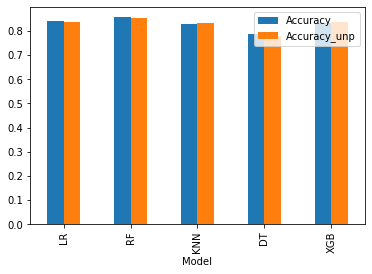

In [ ]:
model_performance_accuracy_final.plot('Model',y=['Accuracy','Accuracy_unp'],kind="bar")